In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('results.csv')

# Display the first few rows of the dataframe
df.head()

dataset  \
0  data/our_datasets/xomo_ground.csv   
1  data/our_datasets/xomo_ground.csv   
2  data/our_datasets/xomo_ground.csv   
3  data/our_datasets/xomo_ground.csv   
4  data/our_datasets/xomo_ground.csv   

                                              method  n_components  last  \
0  Symbolic Dimensionality Reduction with Kmeans ...           0.2    20   
1  Symbolic Dimensionality Reduction with Kmeans ...           0.2    20   
2  Symbolic Dimensionality Reduction with Kmeans ...           0.2    20   
3  Symbolic Dimensionality Reduction with Kmeans ...           0.2    20   
4  Symbolic Dimensionality Reduction with EFB Dis...           0.2    20   

    policy      mean       std      time  xcols  xcols_reduced  rank  
0  exploit  0.203202  0.063752  0.050773     23              4     4  
1   Random  0.179640  0.064659  0.047061     23              4     3  
2    FOCUS  0.216388  0.075952  0.047782     23              4     4  
3  explore  0.174875  0.078228  0.047208     23              4     3  
4  exploit  0.207571  0.065596  0.044509     23              4     3

In [2]:
# Define the bins and labels
bins = [0, 25, 100, float('inf')]
labels = ['small', 'medium', 'large']

# Create a new column 'xcols_group' with the binned data
df['xcols_group'] = pd.cut(df['xcols'], bins=bins, labels=labels, right=False)


# Add a new column to indicate if the method is "Original" or not
df['is_original'] = df['method'] == 'Original'

In [6]:
import matplotlib.pyplot as plt

# Create a boxplot
import plotly.express as px
# Create a grid of boxplots
fig = px.box(df, x='xcols_group', y='time', color='method', facet_col='last', title='Grid of Boxplots of Time by Method')
fig.update_layout(xaxis_title='Method', yaxis_title='Time')
fig.update_layout(legend=dict(orientation='h', yanchor='top', y=-0.2, xanchor='center', x=0.5))
fig.show()

In [8]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(df, x='mean', y='xcols', color='is_original', title='Scatter Plot of Time vs Mean Colored by Original or Not')
fig.update_layout(xaxis_title='Mean Chebyshev Score', yaxis_title='Number of Columns')
fig.show()

In [9]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(df, x='mean', y='xcols', color='method', title='Scatter Plot of Mean vs Time Colored by Method')
fig.show()

In [10]:
rank_counts = df.groupby(['method', 'rank']).size().unstack(fill_value=0)
print(rank_counts)

rank                                                  0   1   2    3    4
method                                                                   
FAMD                                                162  81  81  648    0
Numeric Dimensionality Reduction                      0   0   0  891   81
Numeric Feature Elimination                           0   0   0  810  162
Original                                             54  54  27  162   27
Symbolic Dimensionality Reduction with EFB Disc...    0   0   0  972    0
Symbolic Dimensionality Reduction with Kmeans D...    0   0  81  729  162
Symbolic Feature Elimation with EFB Discretization    0   0  81  810   81
Symbolic Feature Elimation with Kmeans Discreti...   81   0   0  810   81


count    7128.000000
mean       63.037037
std       104.790896
min        11.000000
25%        14.000000
50%        17.000000
75%        88.000000
max       511.000000
Name: xcols, dtype: float64


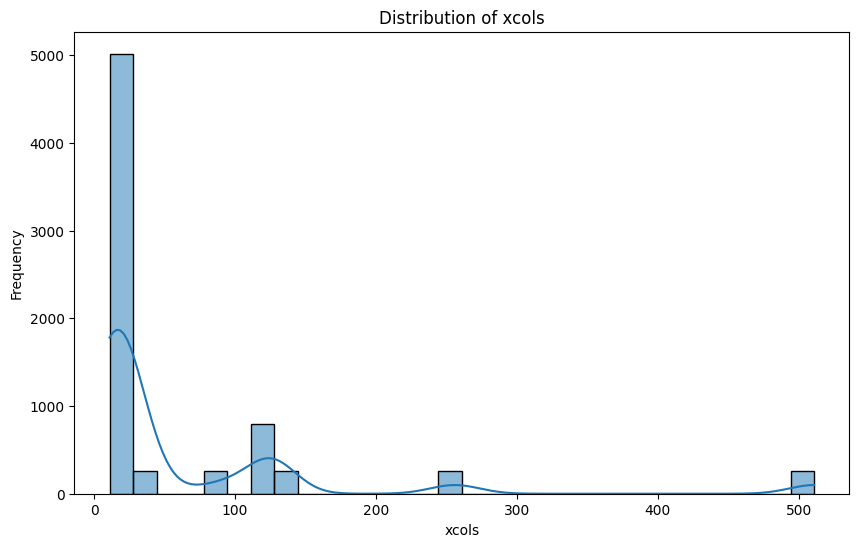

In [11]:
# Summary statistics of the xcols column
xcols_summary = df['xcols'].describe()
print(xcols_summary)

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['xcols'], bins=30, kde=True)
plt.title('Distribution of xcols')
plt.xlabel('xcols')
plt.ylabel('Frequency')
plt.show()

20
Size small
Policy exploit


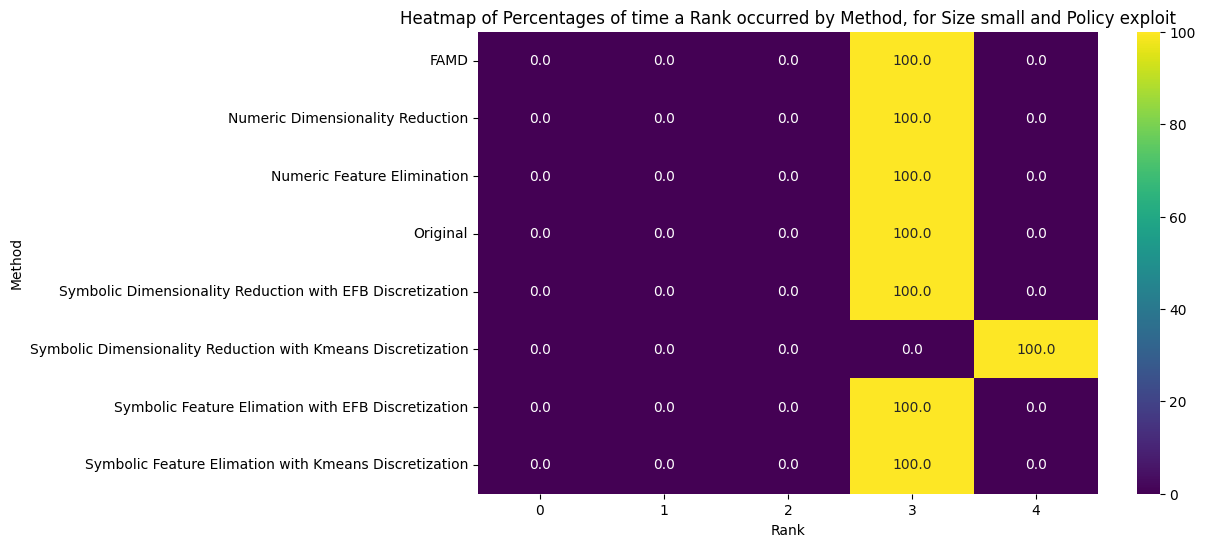

Policy Random


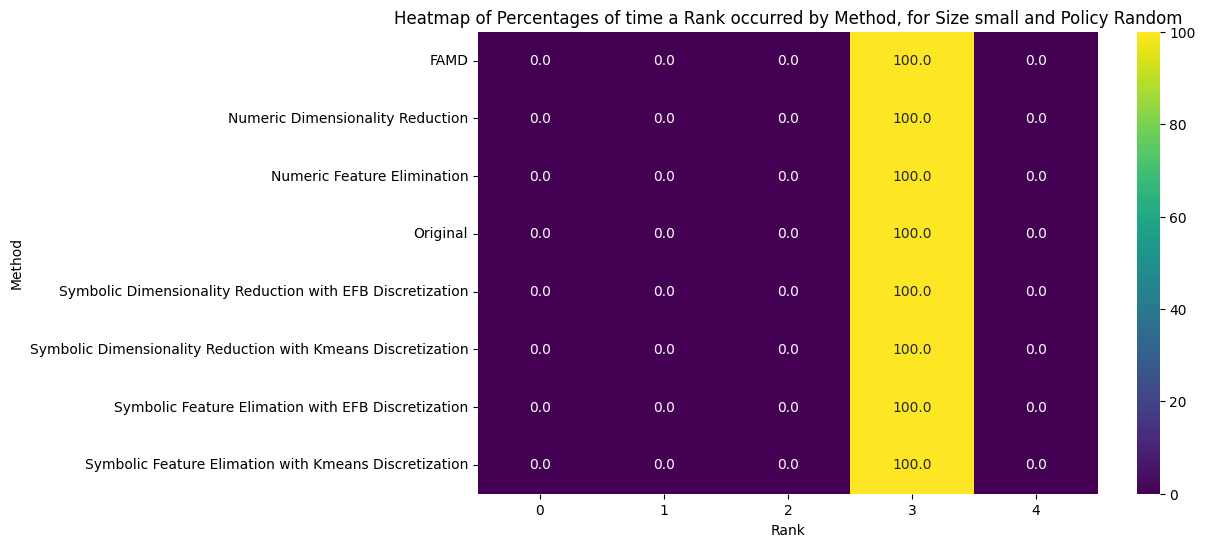

Policy FOCUS


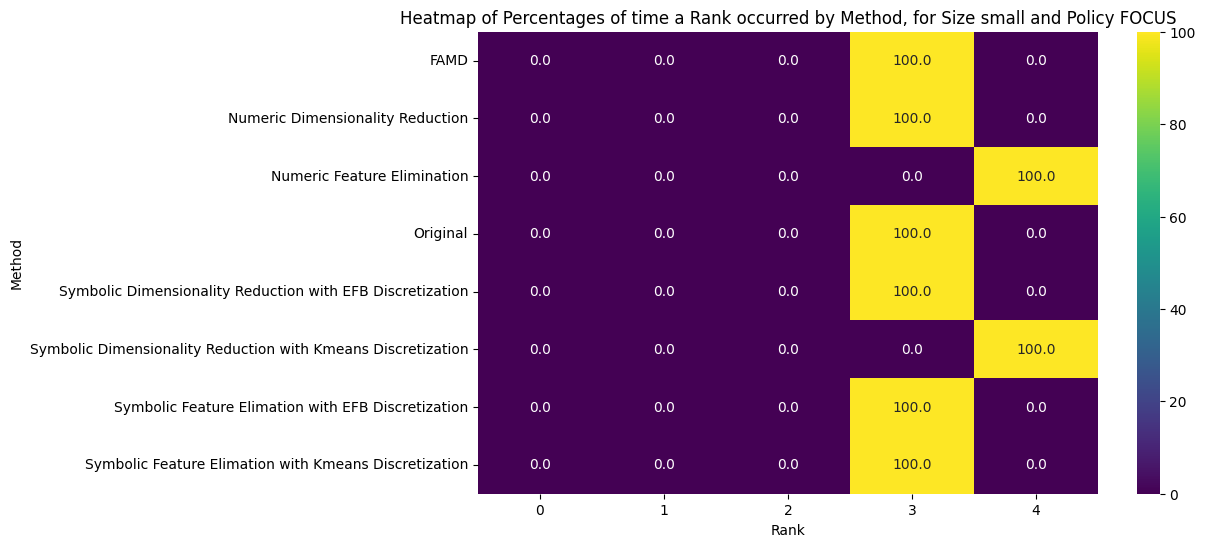

Policy explore


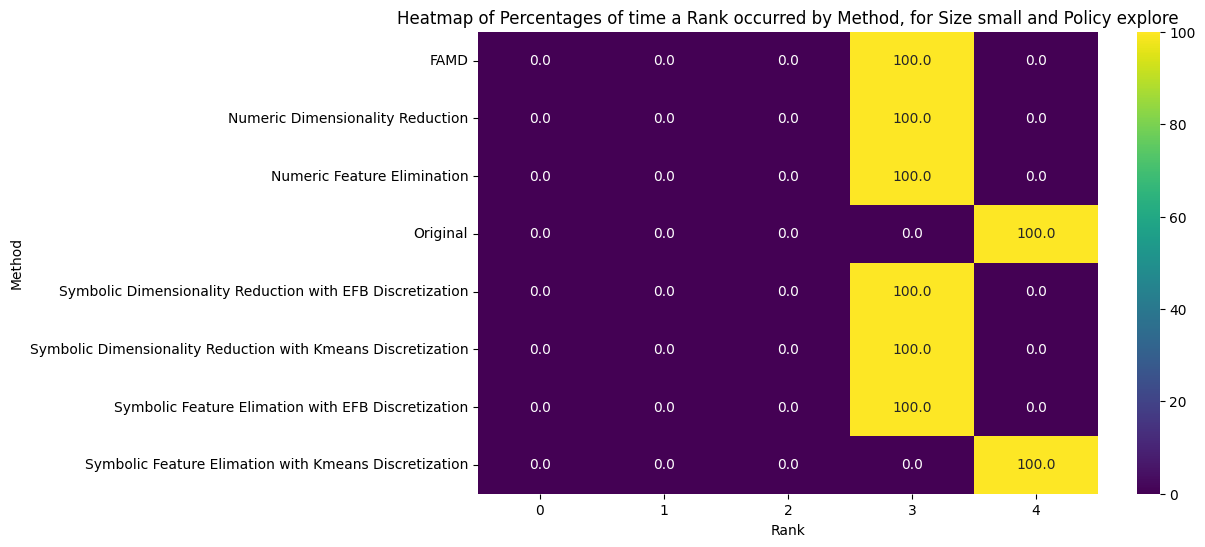

--------------------
Size medium
Policy exploit


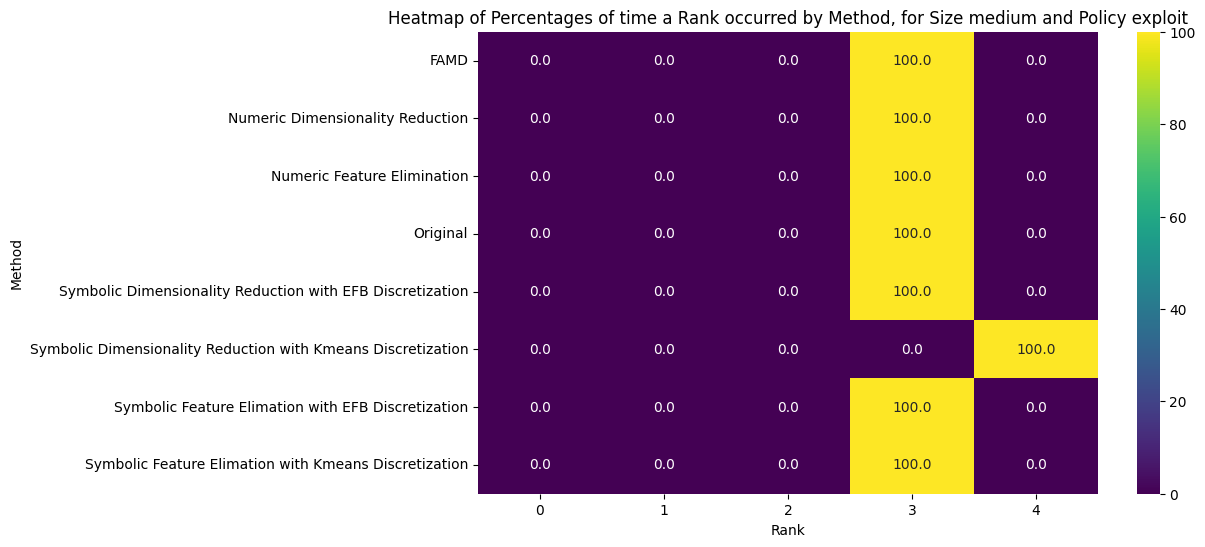

Policy Random


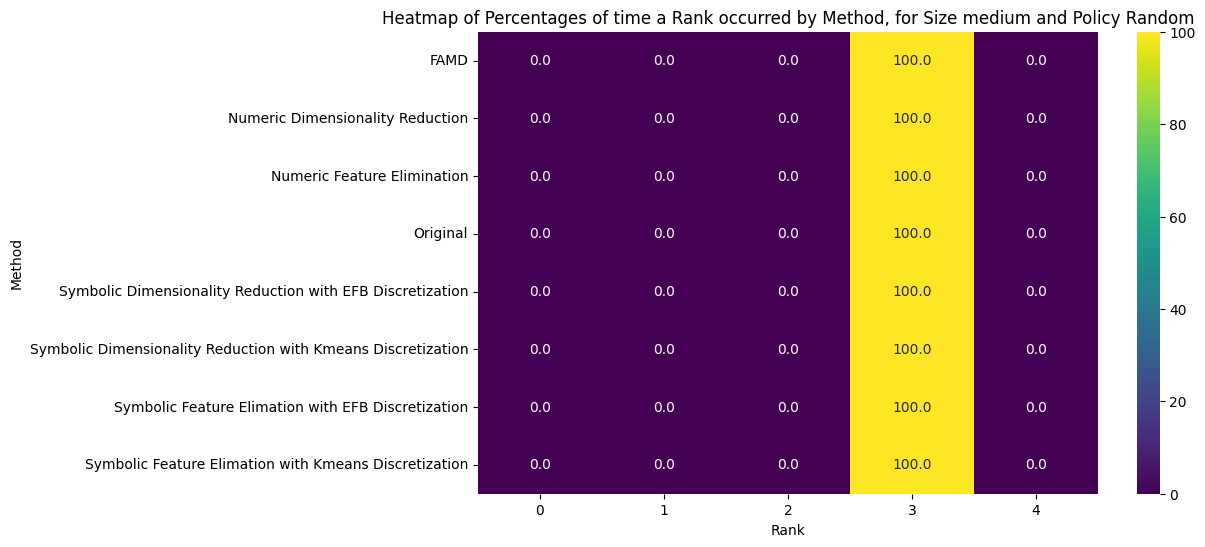

Policy FOCUS


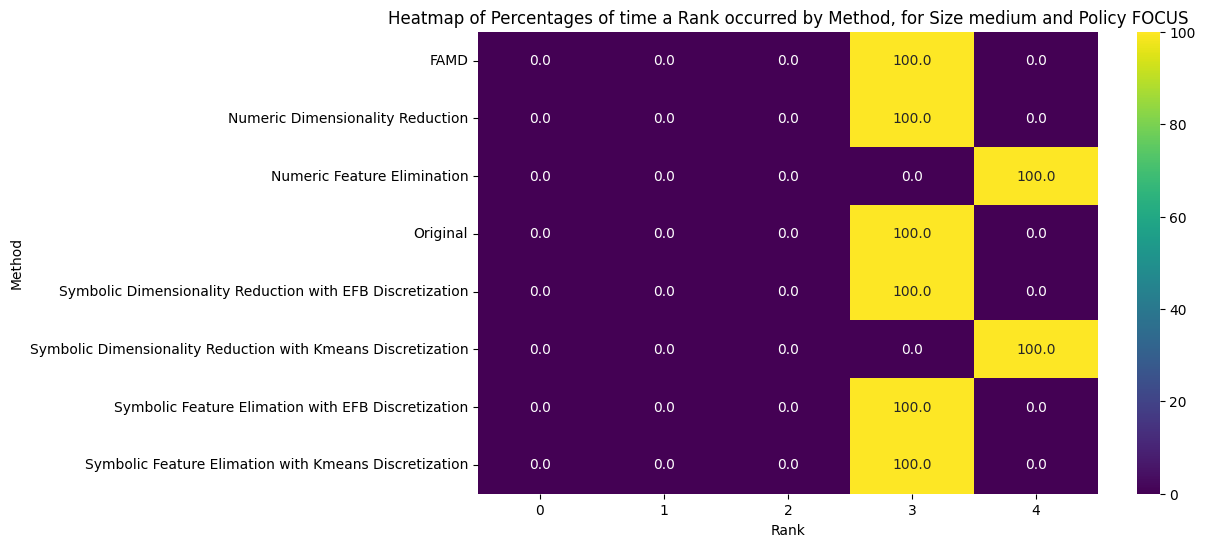

Policy explore


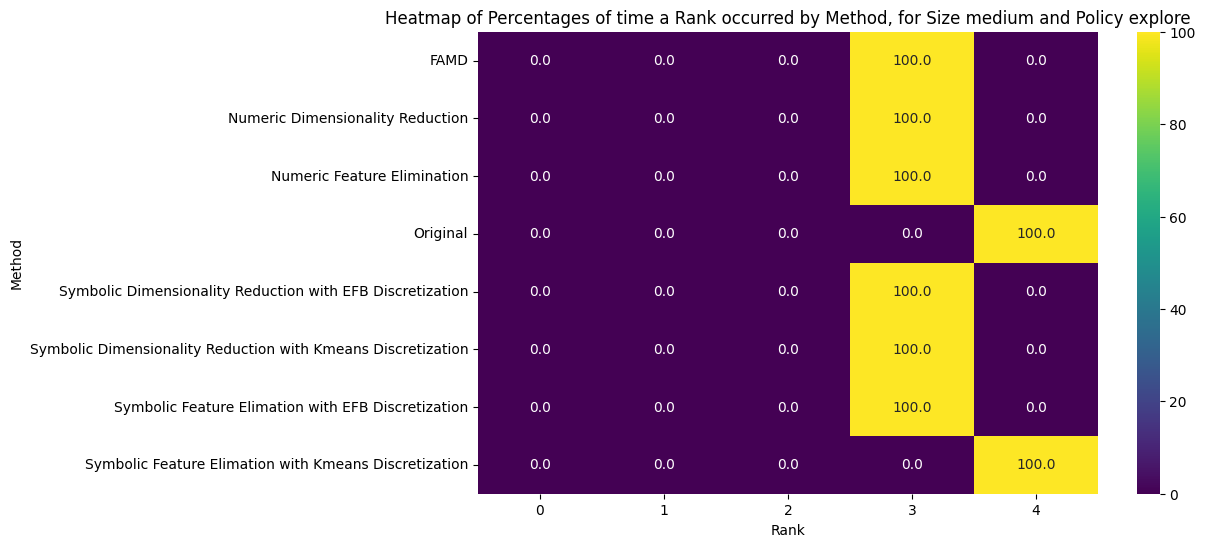

--------------------
Size large
Policy exploit


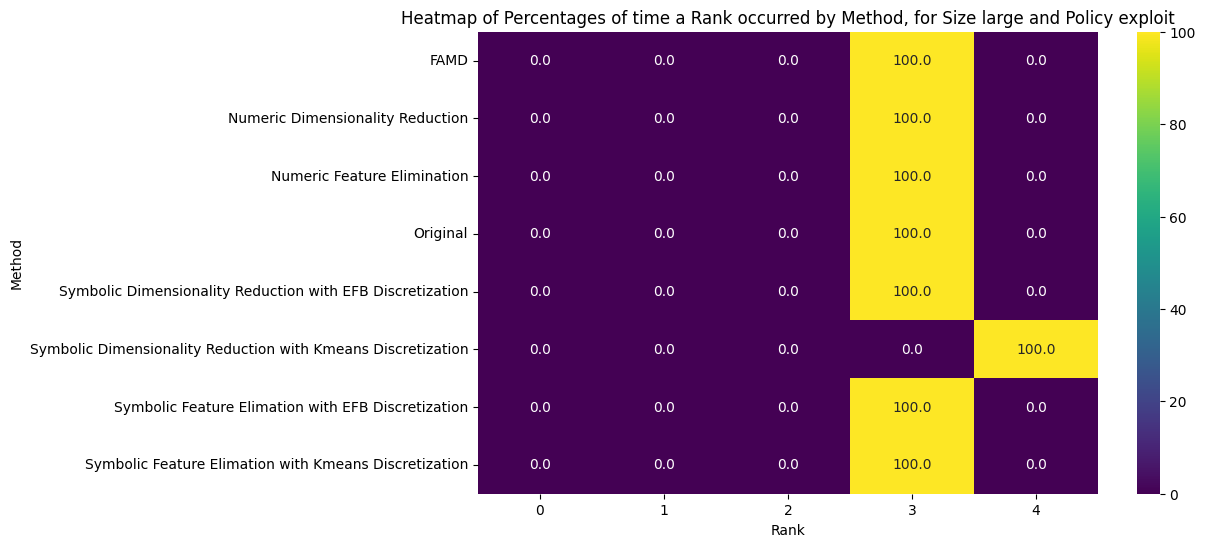

Policy Random


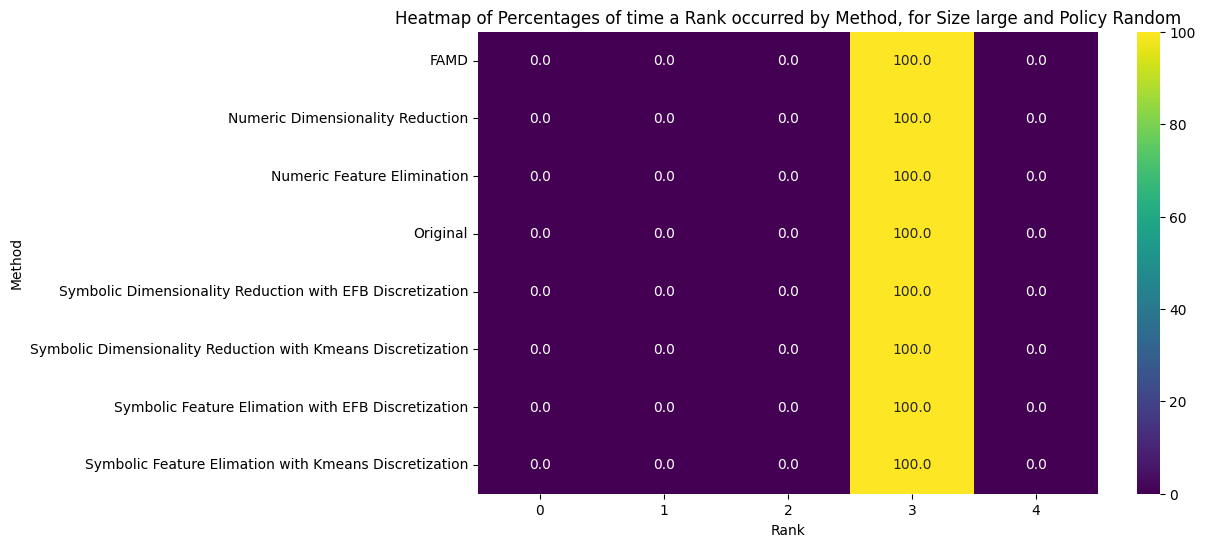

Policy FOCUS


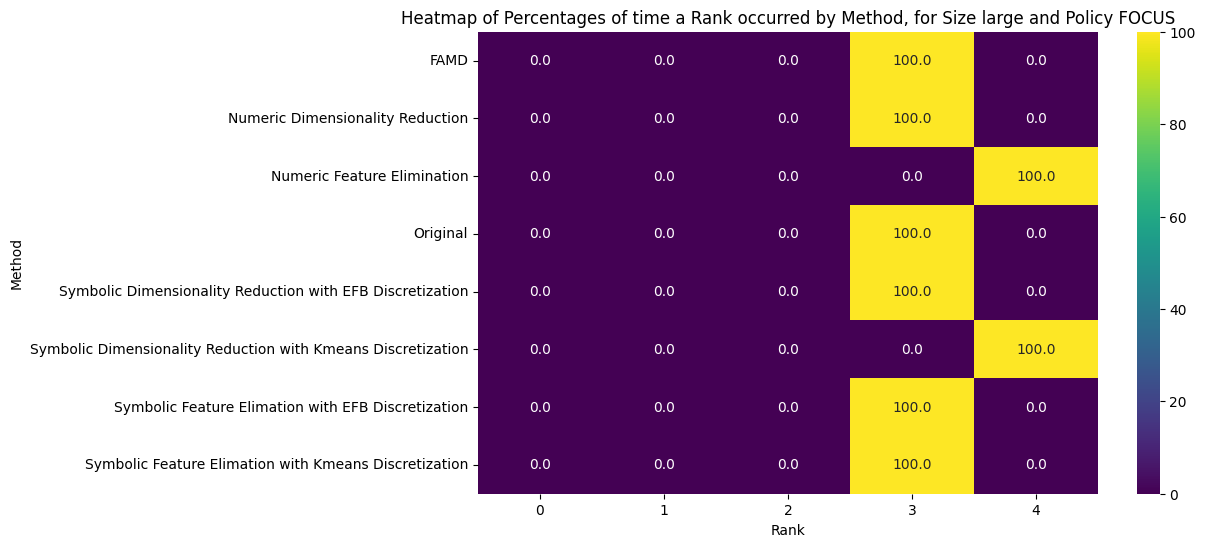

Policy explore


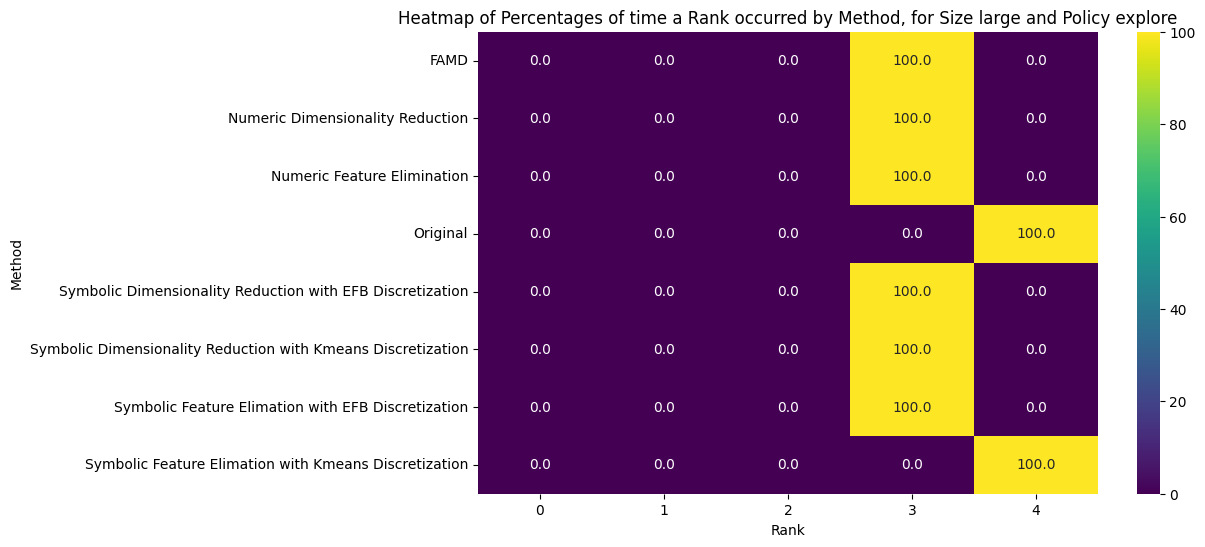

--------------------
30
Size small
Policy exploit


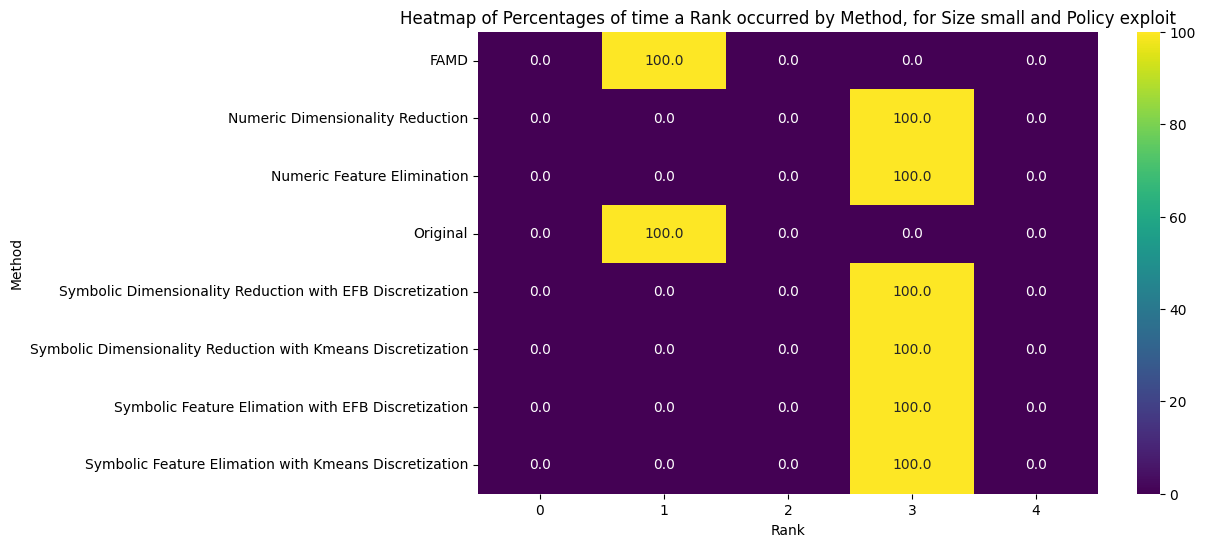

Policy Random


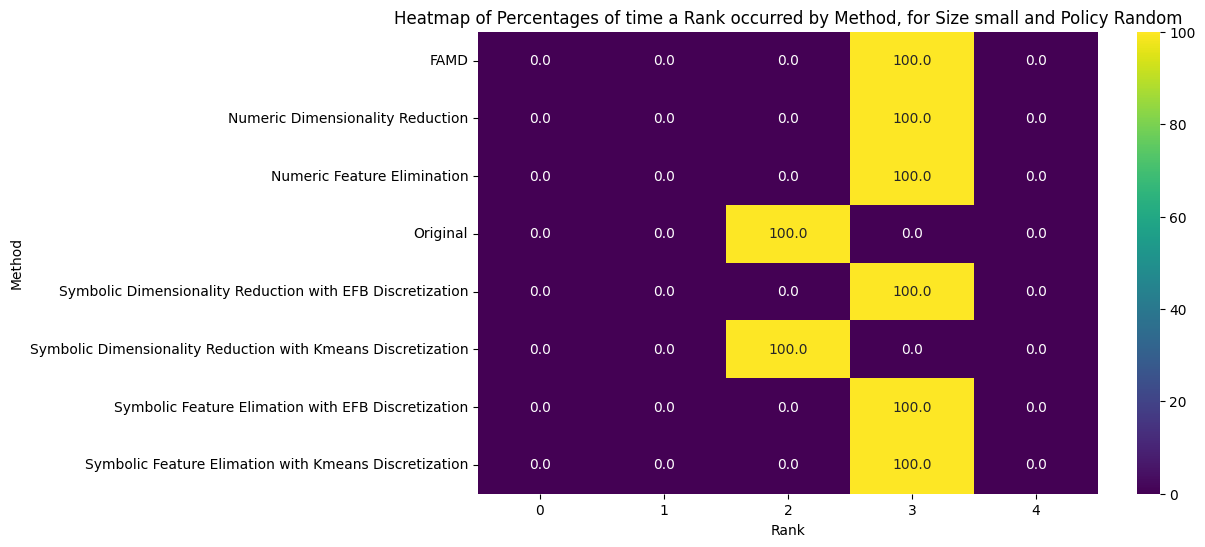

Policy FOCUS


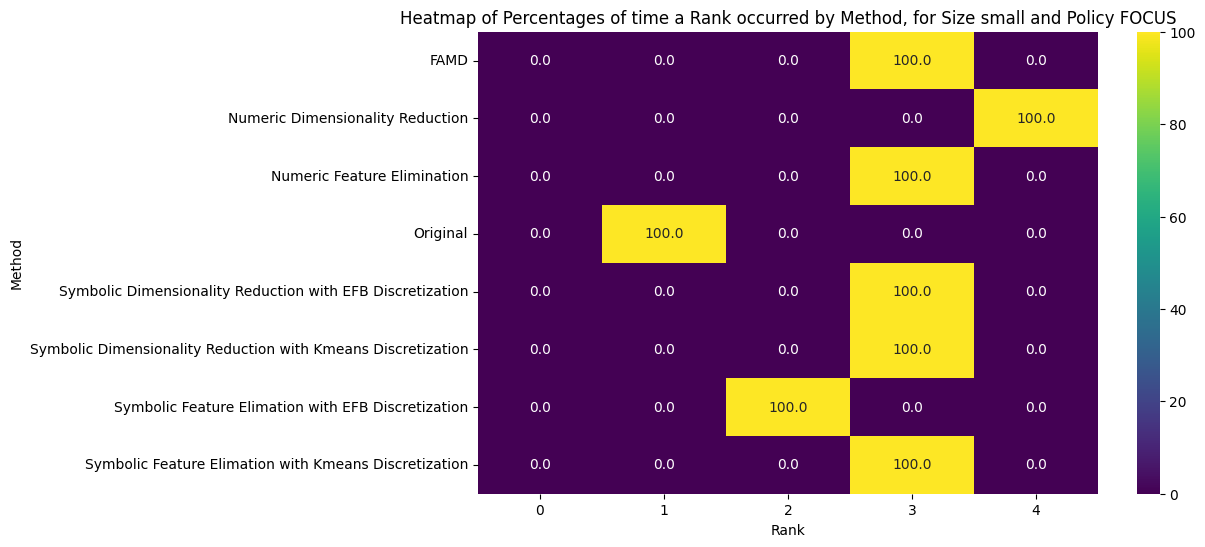

Policy explore


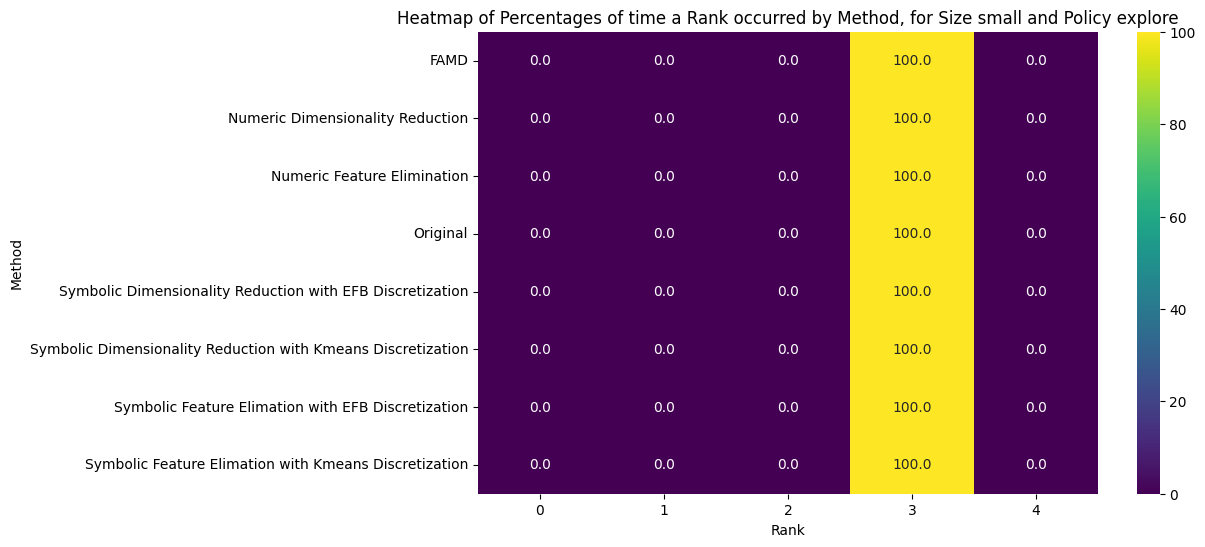

--------------------
Size medium
Policy exploit


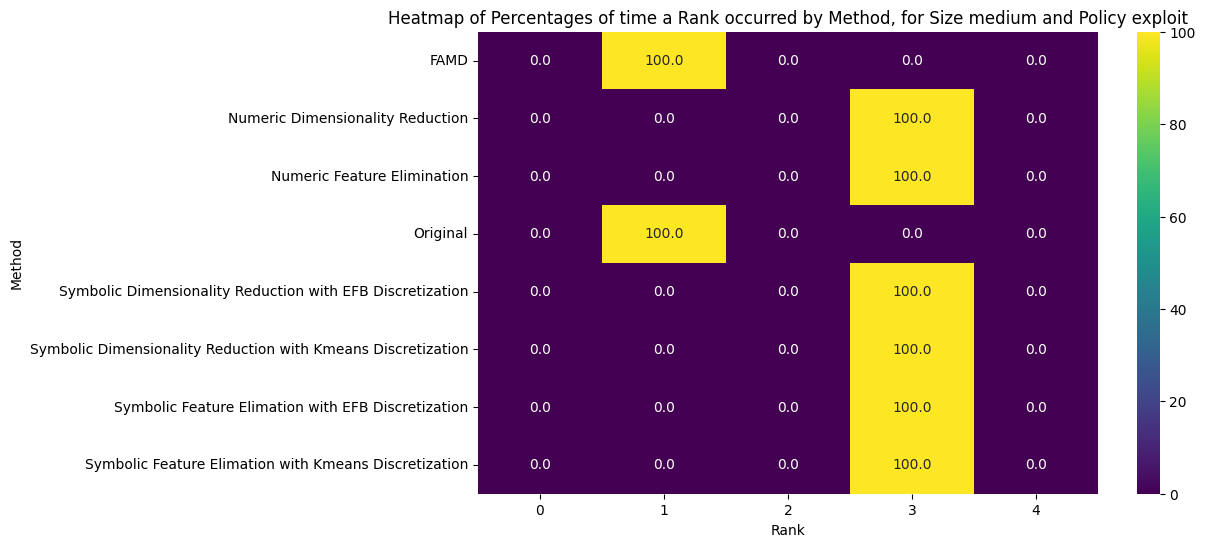

Policy Random


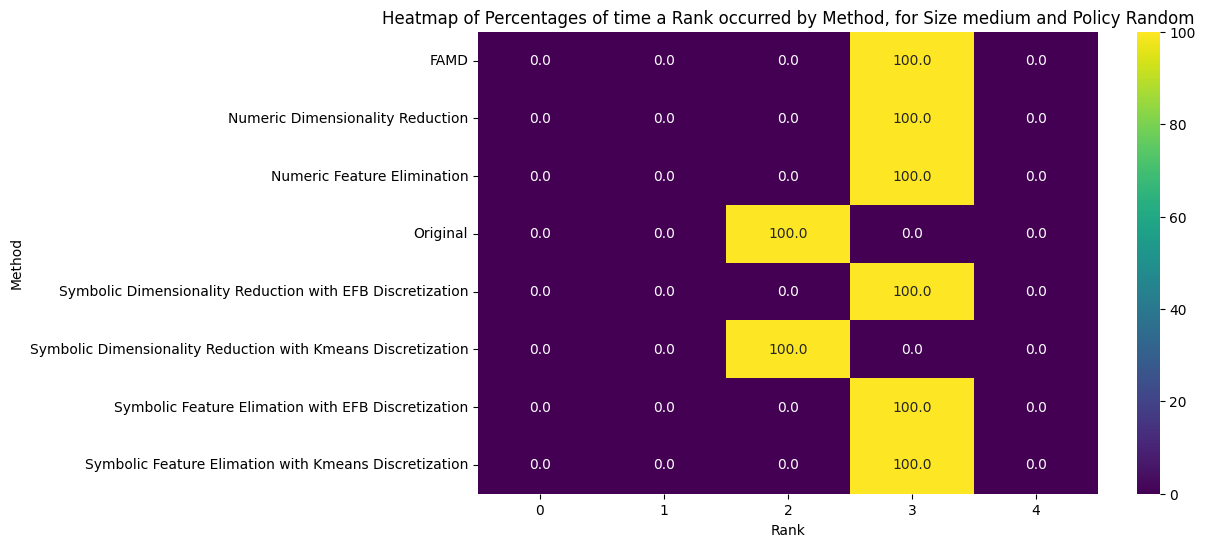

Policy FOCUS


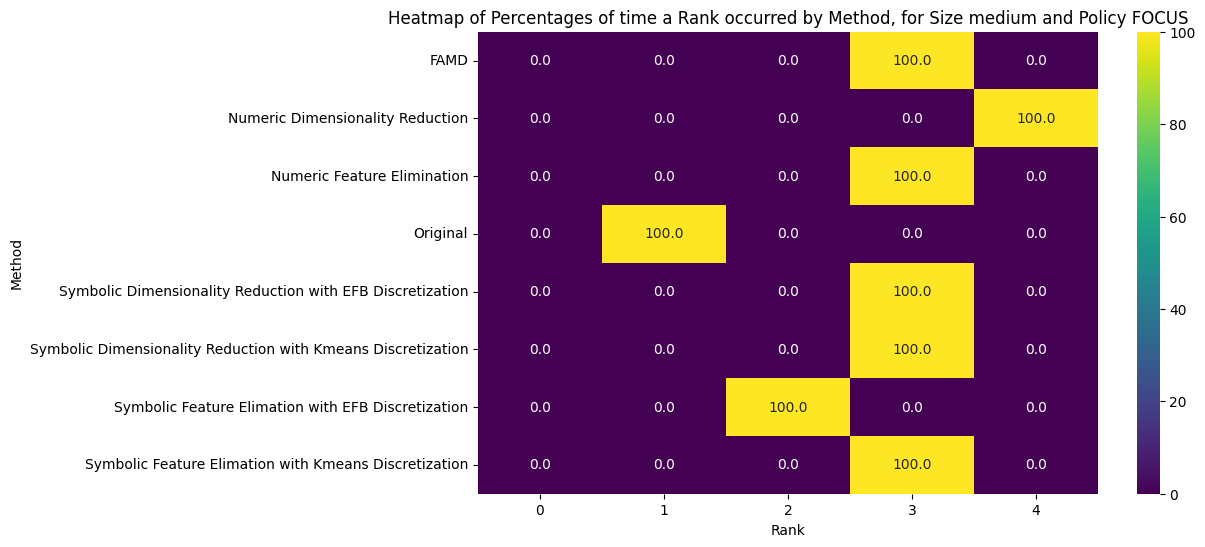

Policy explore


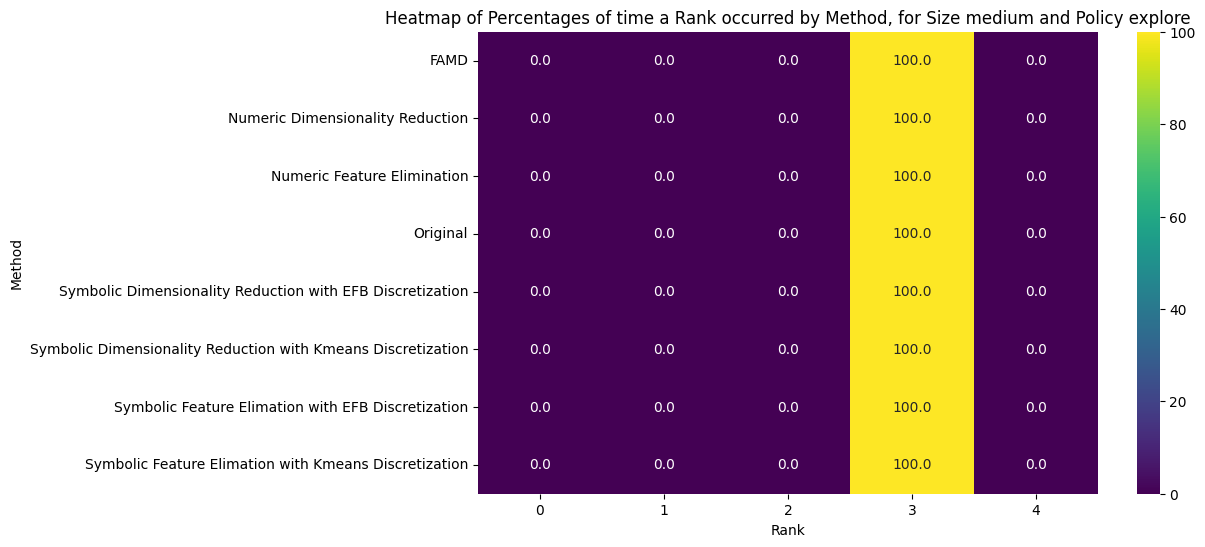

--------------------
Size large
Policy exploit


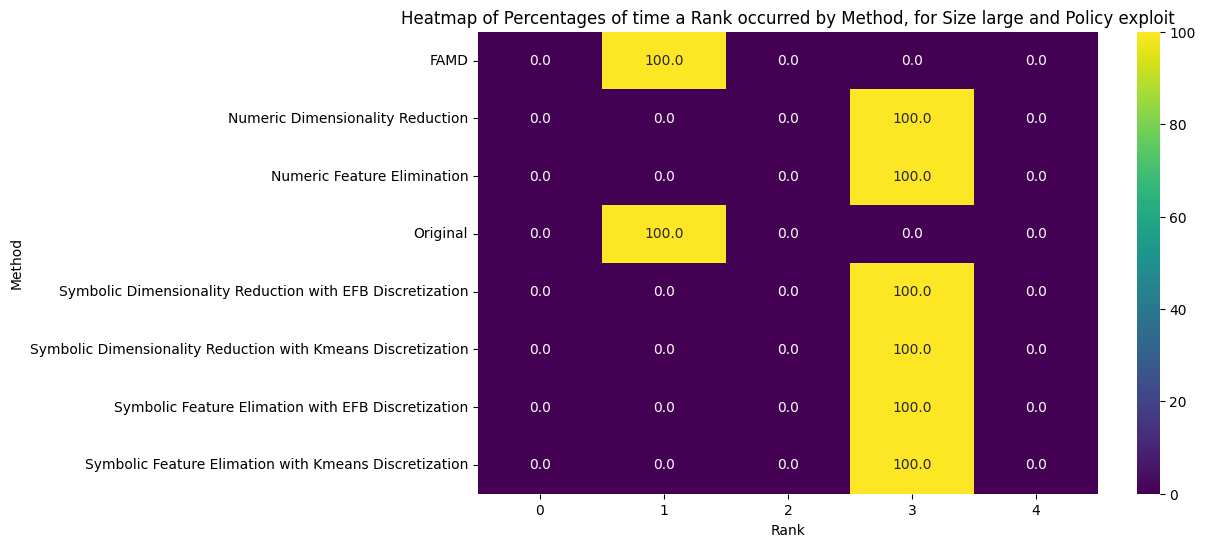

Policy Random


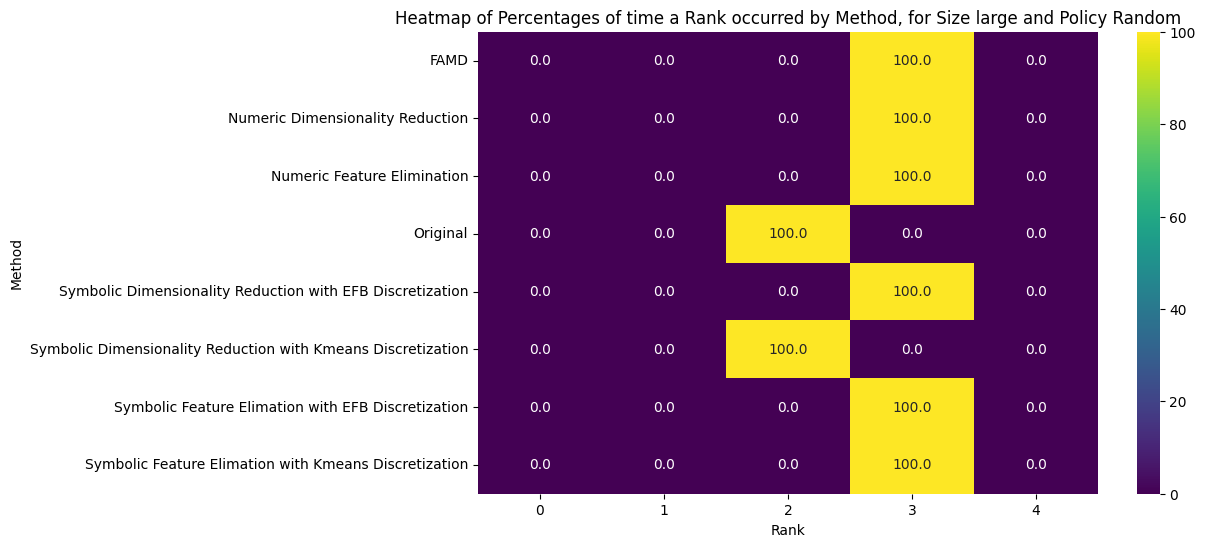

Policy FOCUS


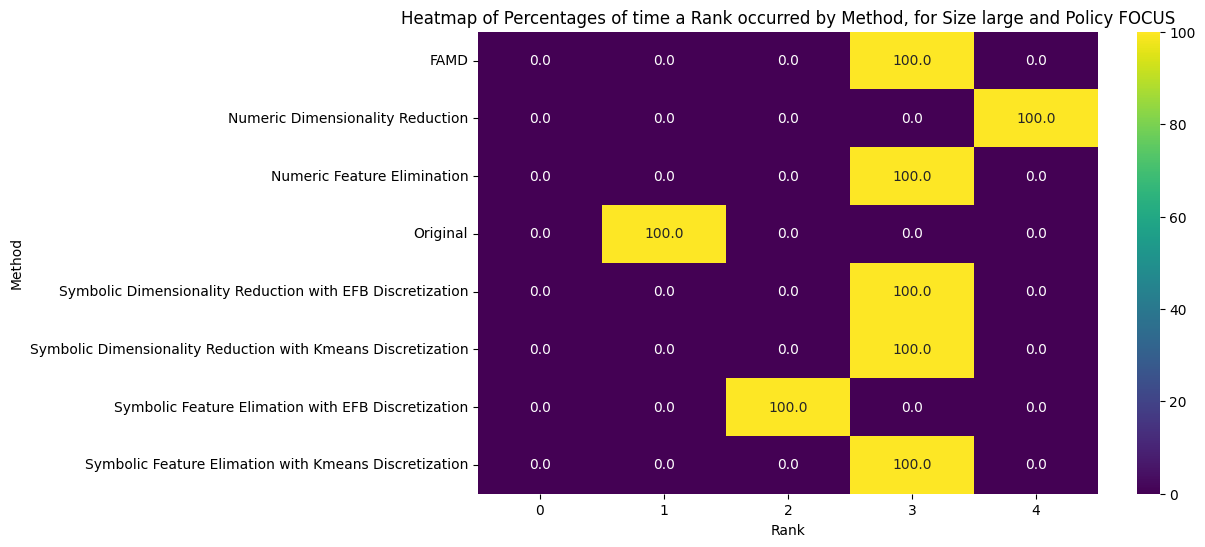

Policy explore


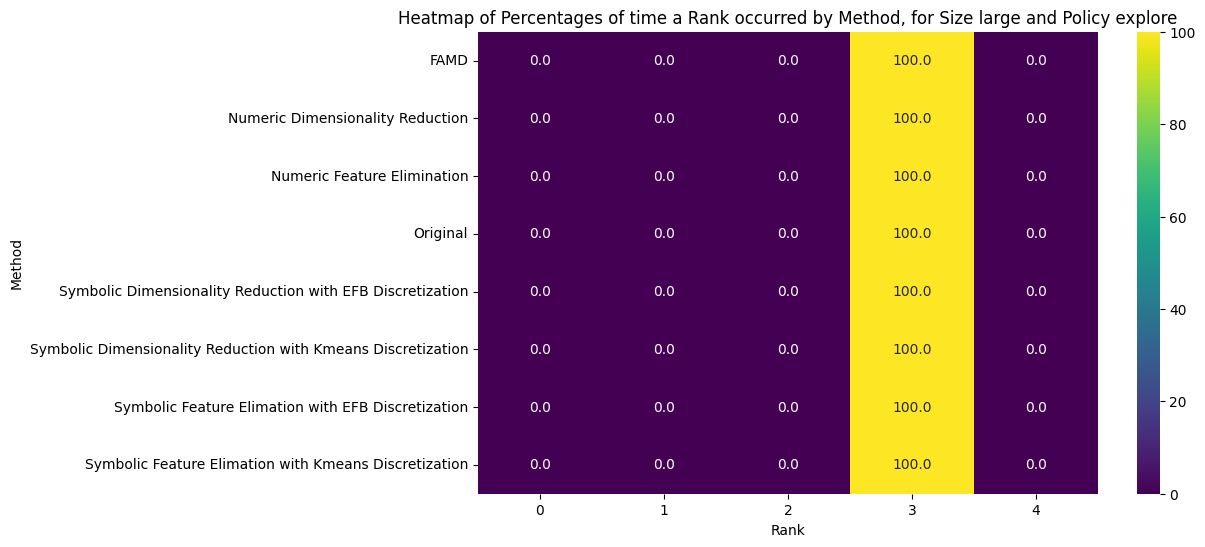

--------------------
40
Size small
Policy exploit


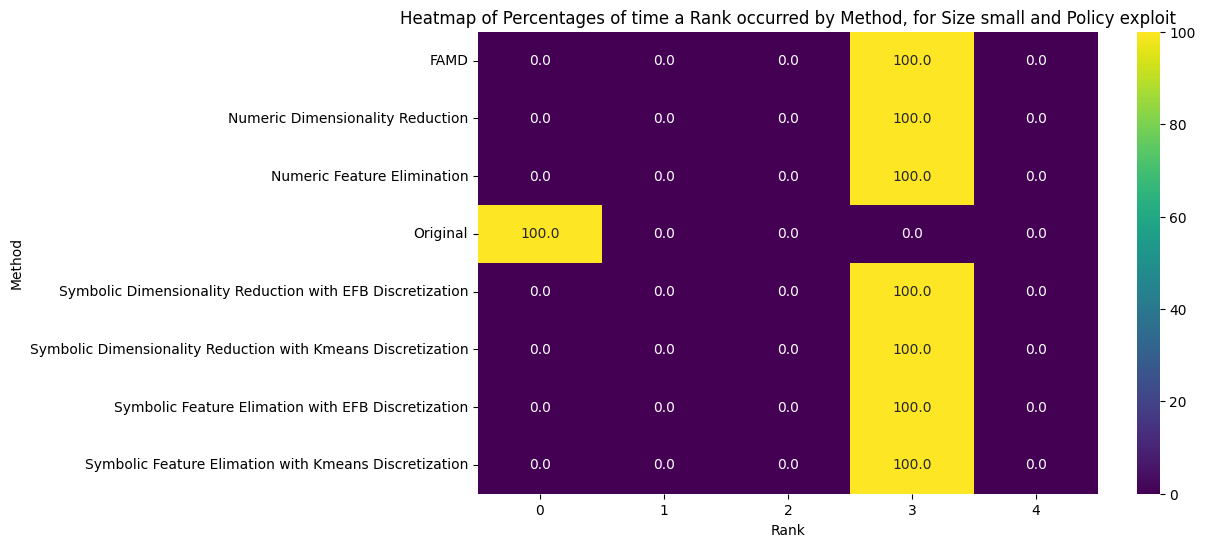

Policy Random


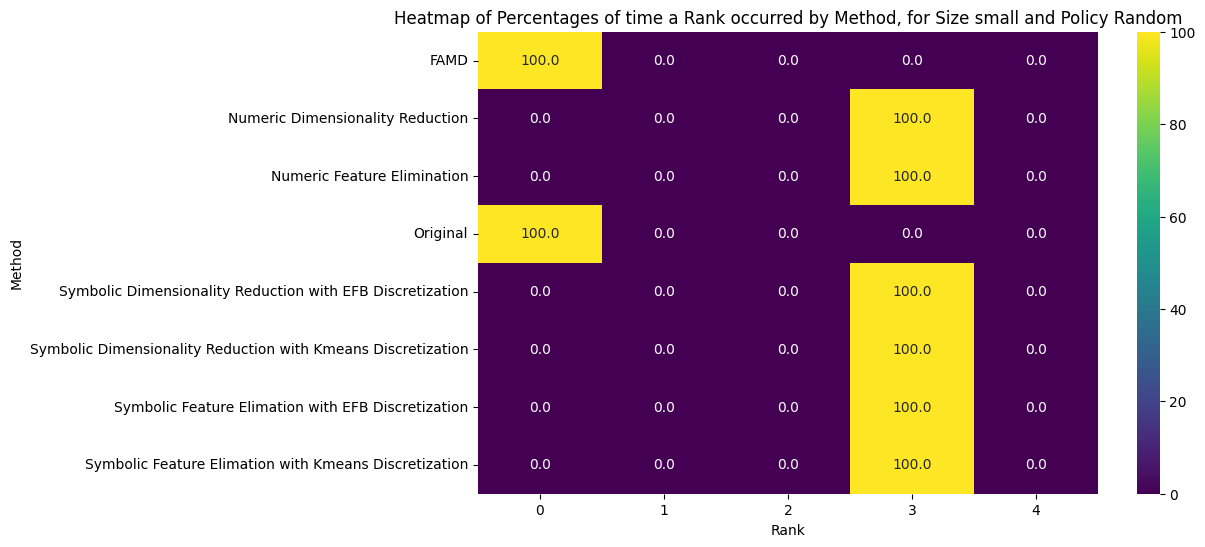

Policy FOCUS


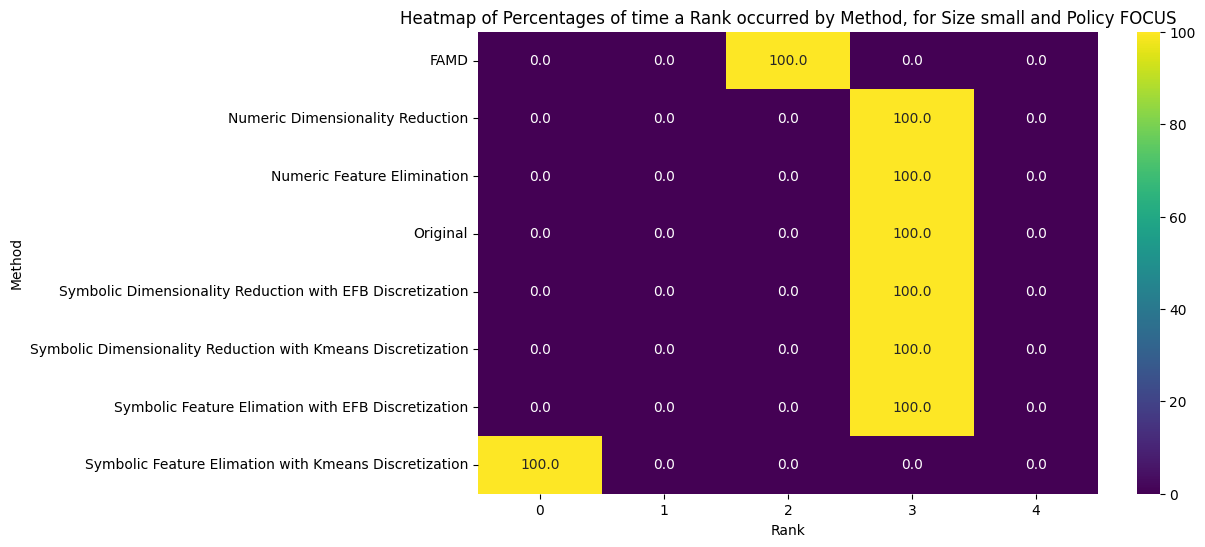

Policy explore


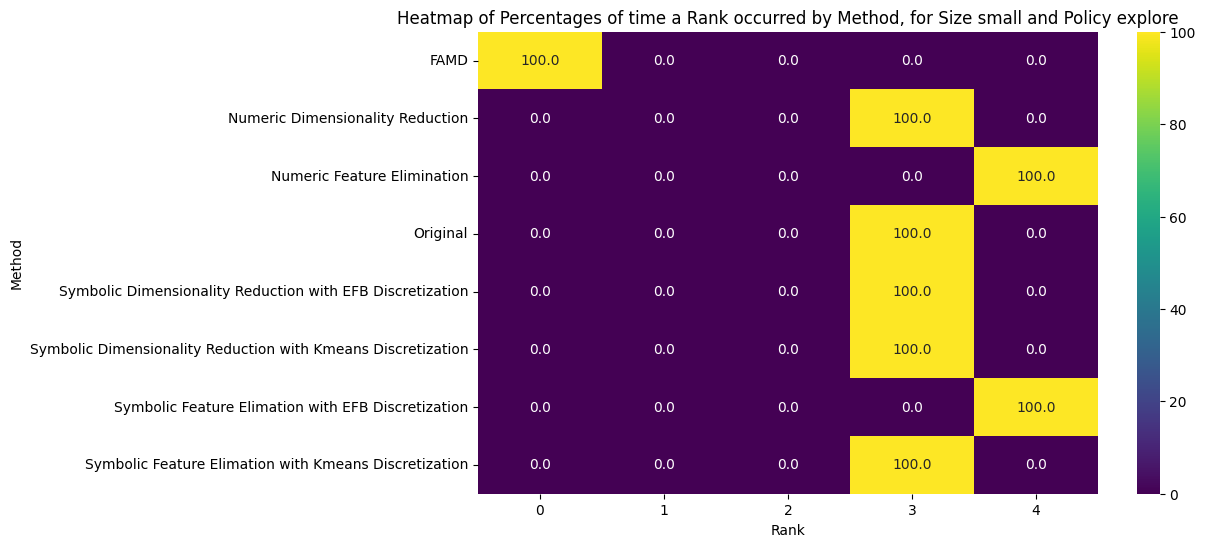

--------------------
Size medium
Policy exploit


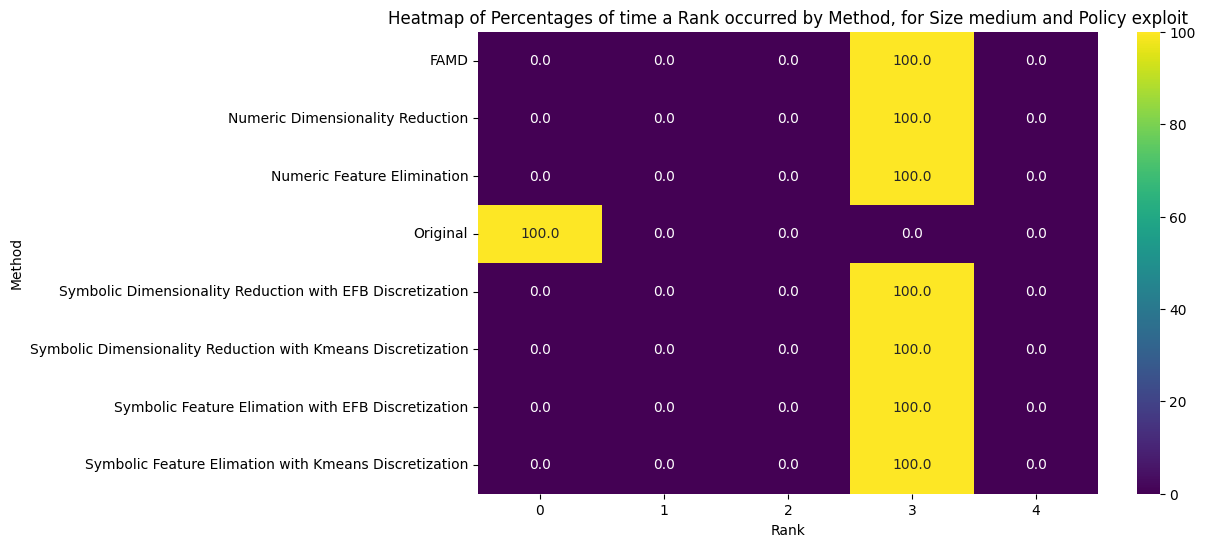

Policy Random


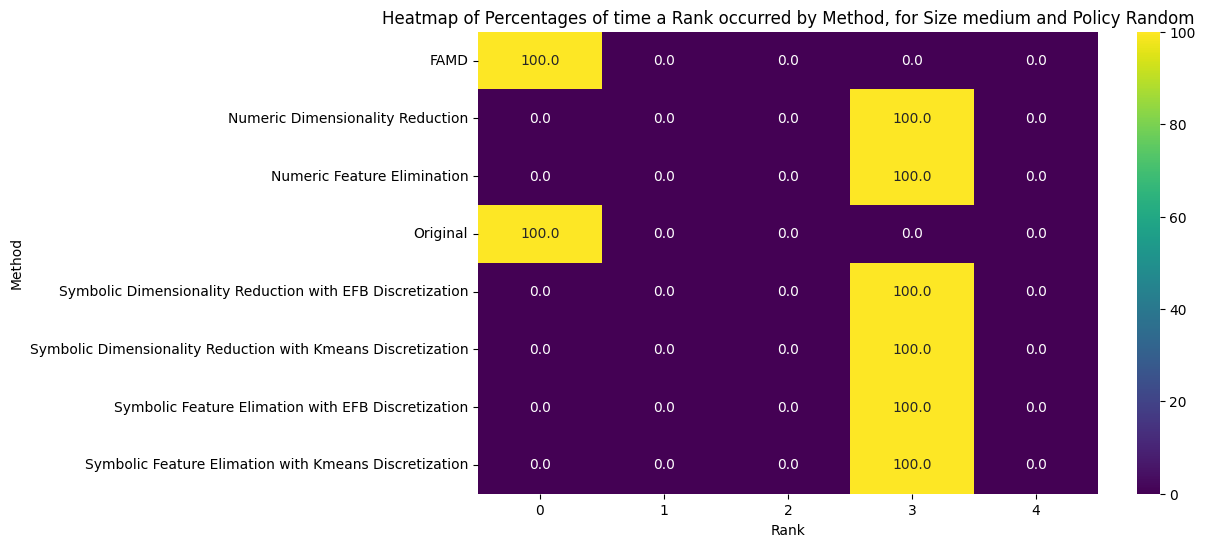

Policy FOCUS


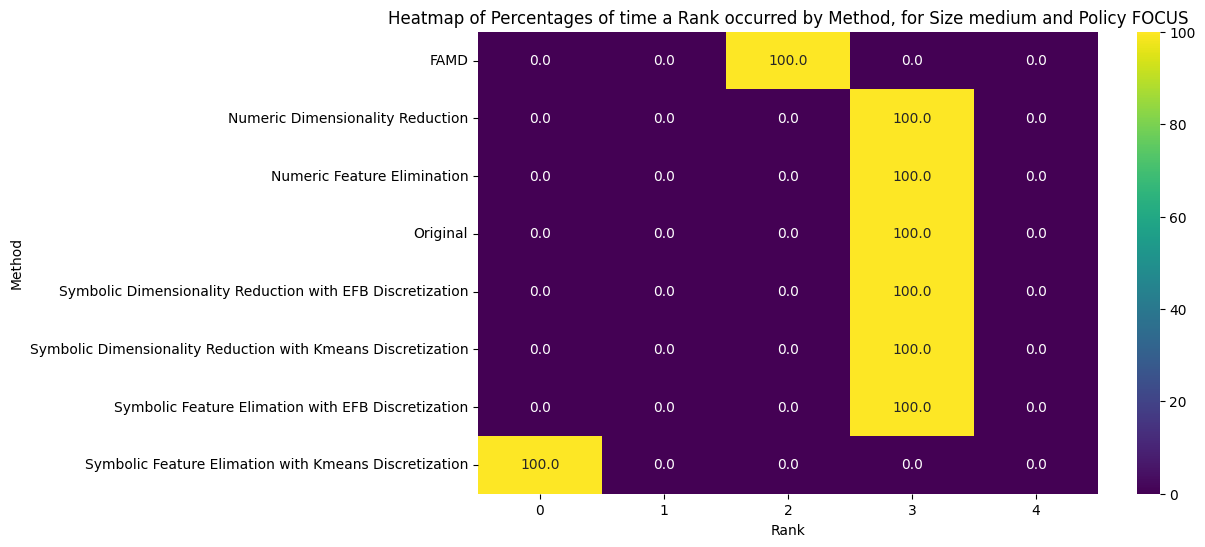

Policy explore


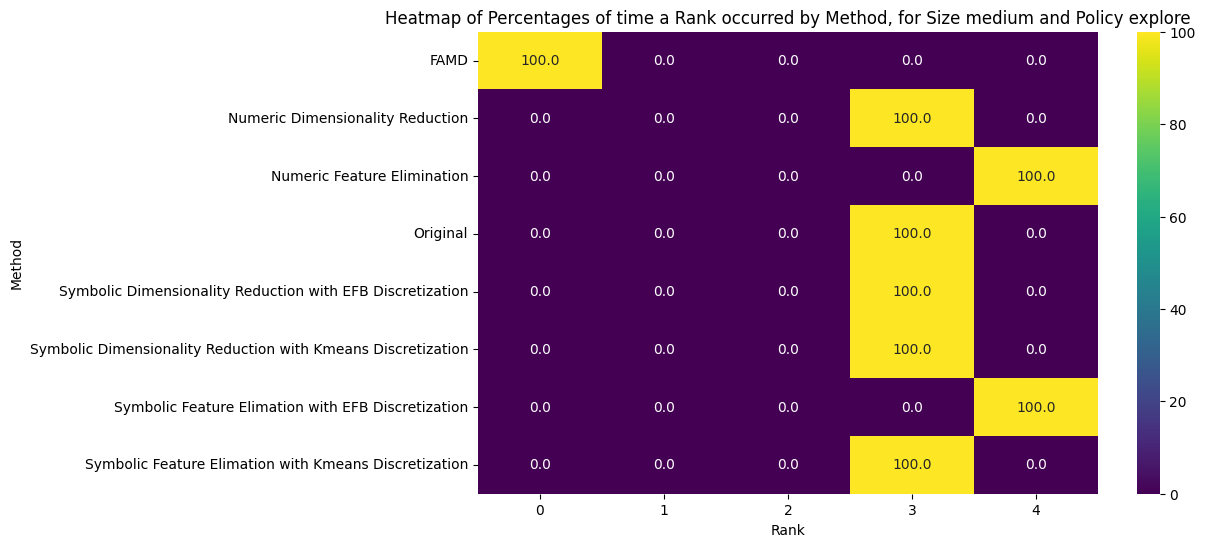

--------------------
Size large
Policy exploit


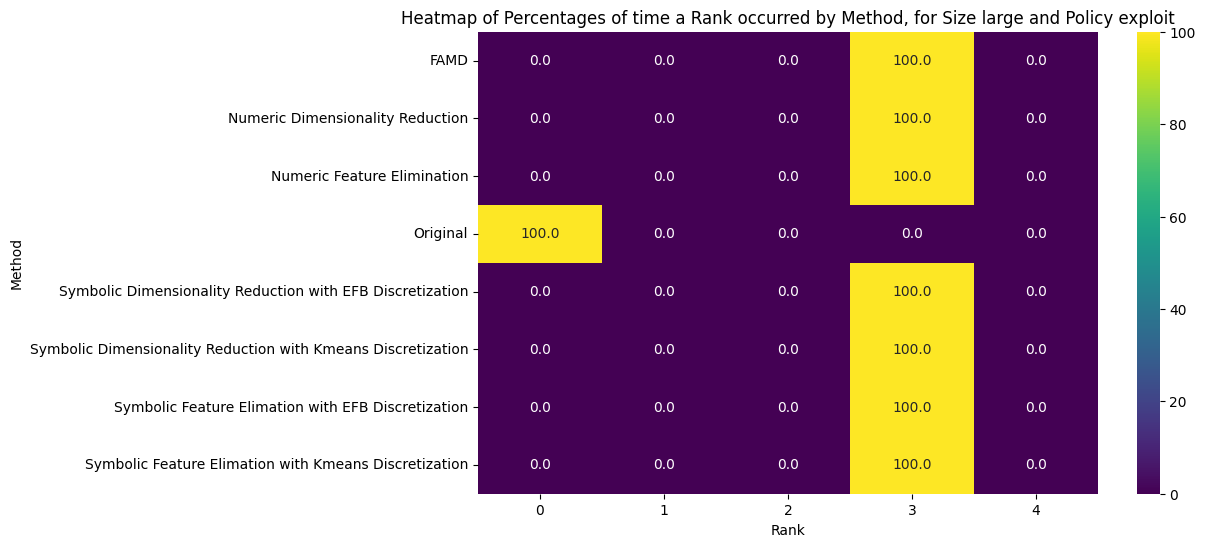

Policy Random


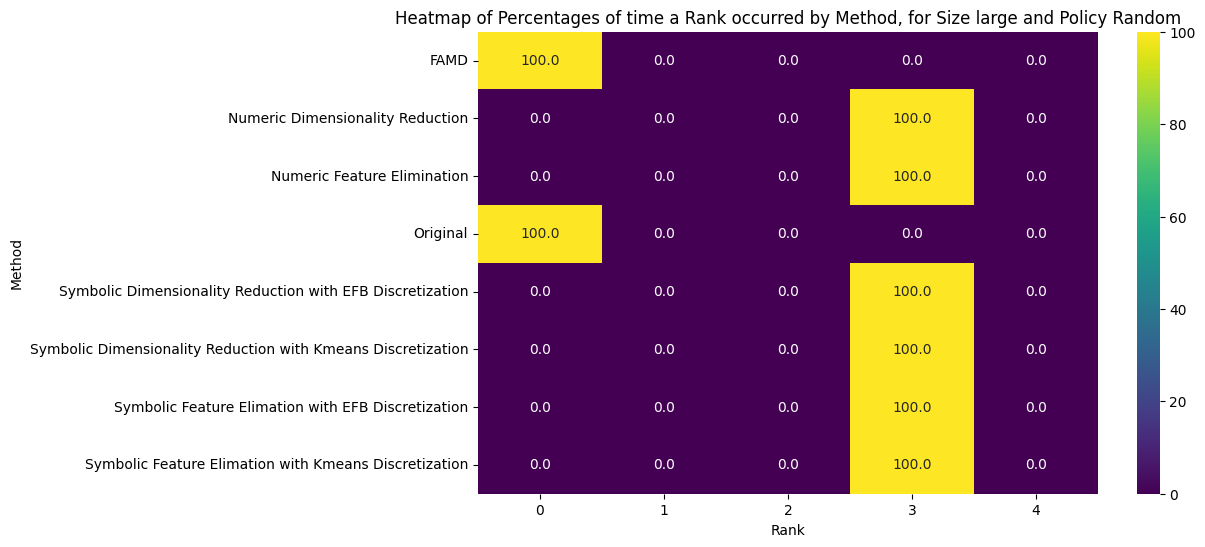

Policy FOCUS


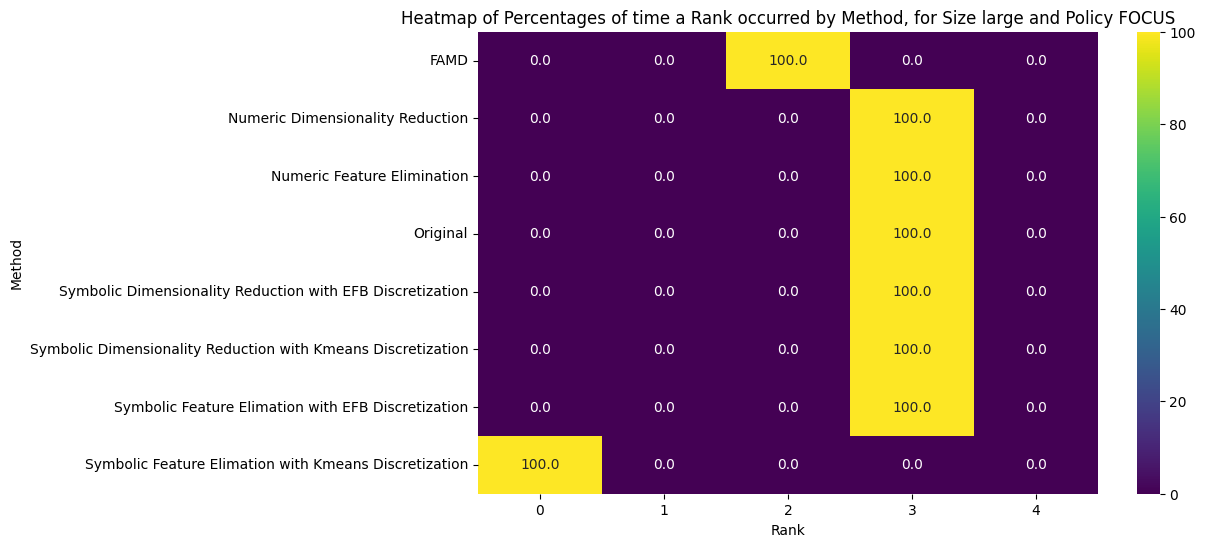

Policy explore


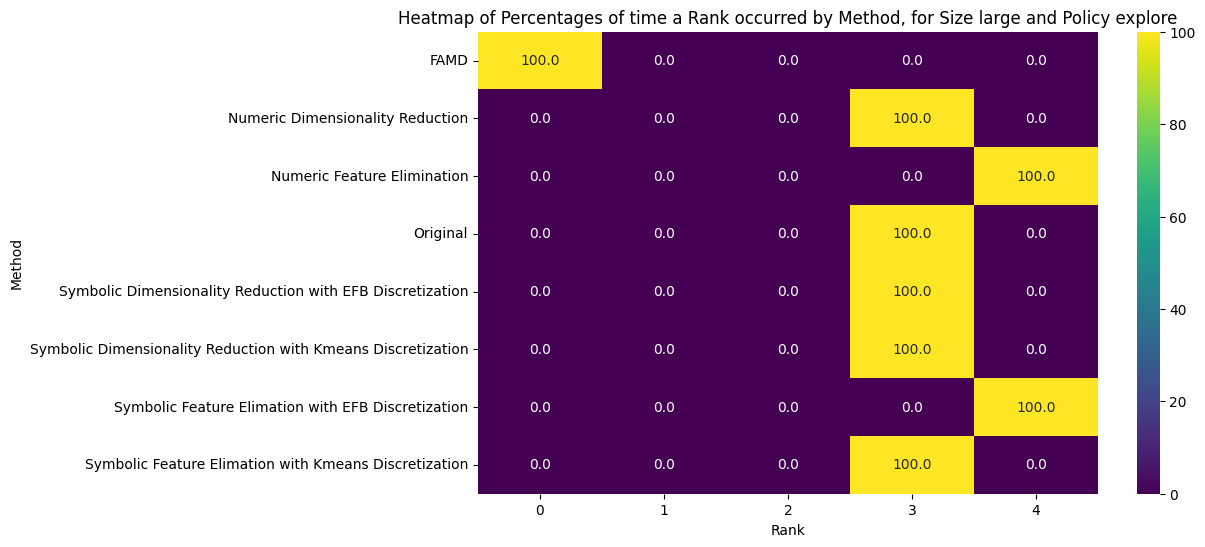

--------------------


In [19]:
# Filter the dataframe based on the value of 'last'
for last in [20,30,40]:
    print(last)
    filtered_df = df[df['last'] ==last]

    for size in ['small', 'medium', 'large']:
        print("Size", size)
        filtered_size_df = filtered_df[filtered_df['xcols_group'] == size]
        for policy in df['policy'].unique():
            print("Policy", policy)
            filtered_policy_df = filtered_size_df[filtered_size_df['policy'] == policy]
            # Group by method and rank, then count the occurrences
            filtered_rank_counts = filtered_policy_df.groupby(['method', 'rank']).size().unstack(fill_value=0)
            rank_percentages = filtered_rank_counts.div(filtered_rank_counts.sum(axis=1), axis=0) * 100
            
            # Ensure all ranks 0, 1, 2, 3, 4 are present for all methods
            for method in rank_percentages.index:
                for rank in range(5):
                    if rank not in rank_percentages.columns:
                        rank_percentages[rank] = 0
            rank_percentages = rank_percentages.sort_index(axis=1)

            # Generate the heatmap
            plt.figure(figsize=(10, 6))
            sns.heatmap(rank_percentages, annot=True, cmap='viridis', fmt='.1f')
            plt.title(f'Heatmap of Percentages of time a Rank occurred by Method, for Size {size} and Policy {policy}')
            plt.xlabel('Rank')
            plt.ylabel('Method')
            plt.show()
        print("--------------------")

In [21]:
group_size = df.groupby('xcols_group').size()
print(group_size)

xcols_group
small     5016
medium     528
large     1584
dtype: int64


/tmp/ipykernel_3529/3377902303.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
rank_counts = df.groupby(['method', 'rank']).size().unstack(fill_value=0)

print(rank_counts)

rank                                                  0   1   2    3    4
method                                                                   
FAMD                                                162  81  81  648    0
Numeric Dimensionality Reduction                      0   0   0  891   81
Numeric Feature Elimination                           0   0   0  810  162
Original                                             54  54  27  162   27
Symbolic Dimensionality Reduction with EFB Disc...    0   0   0  972    0
Symbolic Dimensionality Reduction with Kmeans D...    0   0  81  729  162
Symbolic Feature Elimation with EFB Discretization    0   0  81  810   81
Symbolic Feature Elimation with Kmeans Discreti...   81   0   0  810   81


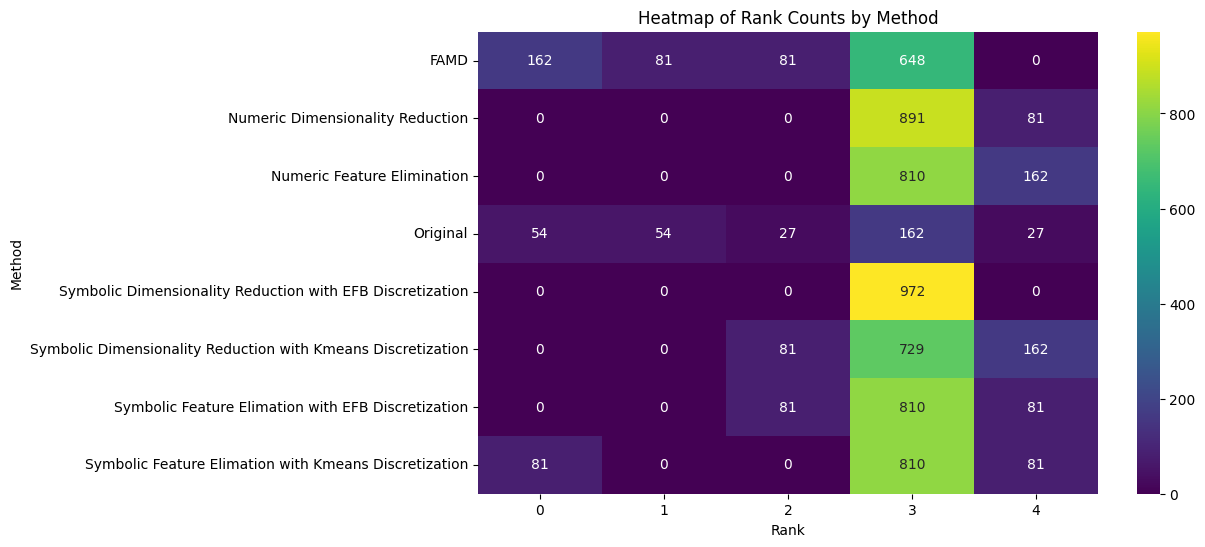

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(rank_counts, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Rank Counts by Method')
plt.xlabel('Rank')
plt.ylabel('Method')
plt.show()

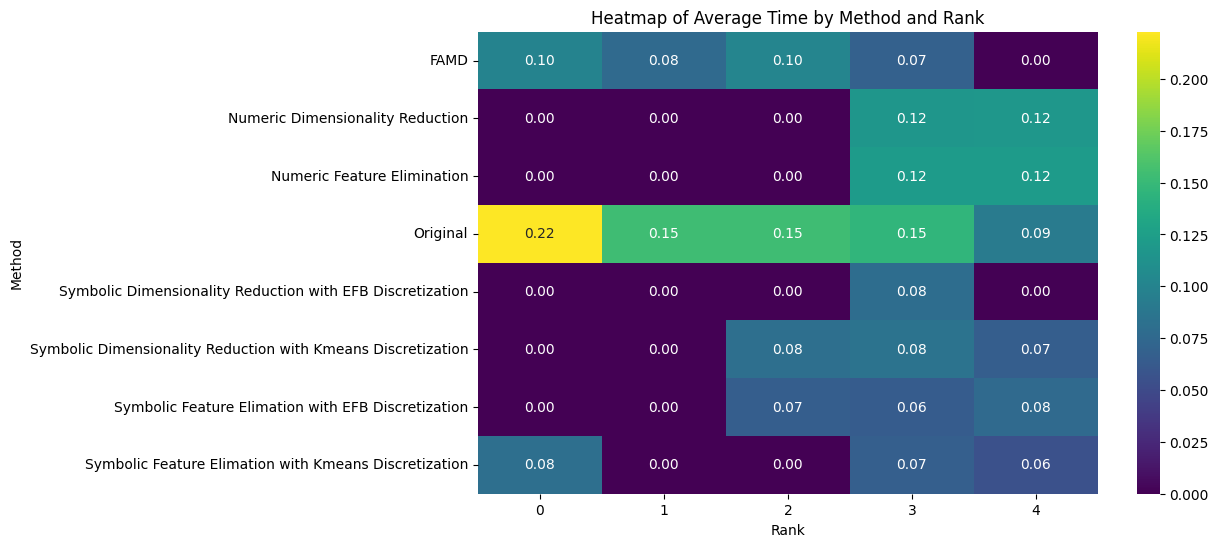

In [23]:
# Calculate the average time for each method and rank
avg_time = df.groupby(['method', 'rank'])['time'].mean().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_time, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Average Time by Method and Rank')
plt.xlabel('Rank')
plt.ylabel('Method')
plt.show()

In [19]:
#for large datasets, bad performance for new methods but time taken is less

In [27]:
# Initialize a dictionary to store the counts
method_counts = {method: 0 for method in df['method'].unique() if method != 'Original'}

# Iterate over each unique dataset
for dataset in df['dataset'].unique():
    # Filter the dataframe for the current dataset
    dataset_df = df[df['dataset'] == dataset]
    
    # Get the rank of the original method
    original_rank = dataset_df[dataset_df['method'] == 'Original']['rank'].values[0]
    
    # Iterate over each method and compare ranks
    for method in method_counts.keys():
        method_rank = dataset_df[dataset_df['method'] == method]['rank'].values[0]
        if method_rank <= original_rank:
            method_counts[method] += 1

# Print the counts
print(method_counts)

{'Symbolic Dimensionality Reduction with Kmeans Discretization': 0, 'Symbolic Dimensionality Reduction with EFB Discretization': 27, 'Numeric Dimensionality Reduction': 27, 'Symbolic Feature Elimation with Kmeans Discretization': 27, 'Symbolic Feature Elimation with EFB Discretization': 27, 'Numeric Feature Elimination': 27, 'FAMD': 27}


In [28]:

lowest_rank_counts = {method: 0 for method in df['method'].unique()}
lowest_rank_time = {method: 0 for method in df['method'].unique()}

for dataset in df['dataset'].unique():
    dataset_df = df[df['dataset'] == dataset]
    lowest_rank = dataset_df['rank'].min()
    lowest_rank_methods = dataset_df[dataset_df['rank'] == lowest_rank][['method','time']]
    for method in lowest_rank_methods['method']:
        if method in lowest_rank_counts:
            lowest_rank_counts[method] += 1
            lowest_rank_time[method] += lowest_rank_methods[lowest_rank_methods['method'] == method]['time'].values[0]
    
print(lowest_rank_counts)

{'Symbolic Dimensionality Reduction with Kmeans Discretization': 0, 'Symbolic Dimensionality Reduction with EFB Discretization': 0, 'Numeric Dimensionality Reduction': 0, 'Symbolic Feature Elimation with Kmeans Discretization': 81, 'Symbolic Feature Elimation with EFB Discretization': 0, 'Numeric Feature Elimination': 0, 'FAMD': 162, 'Original': 54}


In [32]:
avg_time = {method: lowest_rank_time[method] / max(1,lowest_rank_counts[method]) for method in lowest_rank_counts}
avg_time

{'Symbolic Dimensionality Reduction with Kmeans Discretization': 0.0,
 'Symbolic Dimensionality Reduction with EFB Discretization': 0.0,
 'Numeric Dimensionality Reduction': 0.0,
 'Symbolic Feature Elimation with Kmeans Discretization': np.float64(0.06928586959838863),
 'Symbolic Feature Elimation with EFB Discretization': 0.0,
 'Numeric Feature Elimination': 0.0,
 'FAMD': np.float64(0.09666168733879377),
 'Original': np.float64(0.22292630804909605)}

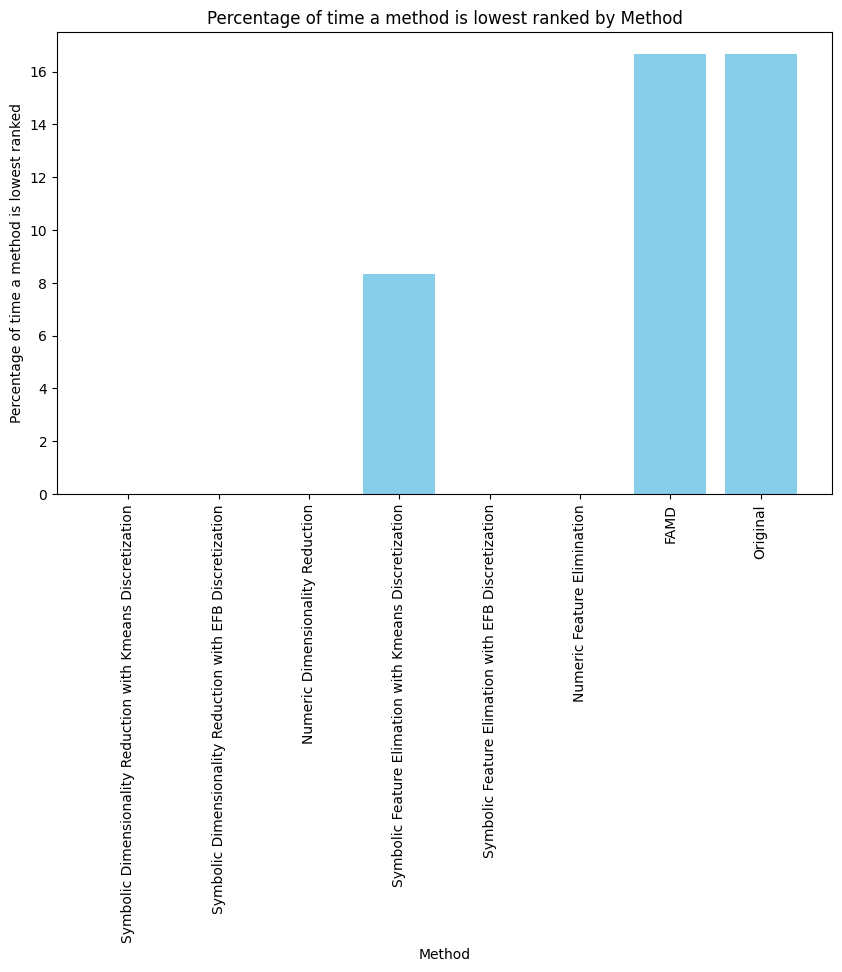

In [36]:

lowest_rank_counts = {method: 0 for method in df['method'].unique()}
method_total_counts = df['method'].value_counts().to_dict()

for dataset in df['dataset'].unique():
    dataset_df = df[df['dataset'] == dataset]
    lowest_rank = dataset_df['rank'].min()
    lowest_rank_methods = dataset_df[dataset_df['rank'] == lowest_rank]['method']
    for method in lowest_rank_methods:
        if method in lowest_rank_counts:
            lowest_rank_counts[method] += 1

lowest_rank_percentages = {method: (count / method_total_counts[method]) * 100 for method, count in lowest_rank_counts.items()}

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(lowest_rank_percentages.keys(), lowest_rank_percentages.values(), color='skyblue')
plt.xlabel('Method')
plt.ylabel('Percentage of time a method is lowest ranked')
plt.title('Percentage of time a method is lowest ranked by Method')
plt.xticks(rotation=90)
plt.show()